#Libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Dataset Read and statistics


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df_train = pd.read_csv('/content/drive/MyDrive/PR/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/PR/Test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/PR/Val.csv')


In [102]:
df_train.head(1)

ID                     Data  Love  Joy  Surprise  Anger  Sadness  Fear  \
0  5454  ‡¶≤‡¶ï‡¶æ‡¶≤ ‡¶¨‡¶æ‡¶∏ ‡¶≠‡¶æ‡¶≤‡ßã ‡¶è‡¶ü‡¶æ ‡¶•‡ßá‡¶ï‡ßá      0    0         0      0        1     0   

    Topic   Domain  is_admin  
0  Travel  Youtube     False

In [103]:
df_test.head(1)

ID                                             Data  Love  Joy  Surprise  \
0  46  ‡¶§‡¶æ‡¶∞‡¶æ‡¶á ‡¶Æ‡¶®‡ßá ‡¶ï‡¶∞‡ßá ‡¶¨‡ßç‡¶∞‡ßã ‡¶¨‡¶≤‡¶æ ‡¶Æ‡¶æ‡¶®‡ßá ‡¶ü‡ßç‡¶∞‡¶≤ ‡¶ï‡¶∞‡¶æ‡•§""- ‡¶¨‡ßç‡¶∞‡ßã"      0    0         0   

   Anger  Sadness  Fear   Topic    Domain  is_admin  
0      1        0     0  Sports  Facebook      True

In [104]:
df_val.head(1)

ID                                               Data  Love  Joy  \
0  18313  ‡¶ö‡¶ü‡ßç‡¶∞‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶è‡¶¨‡¶Ç ‡¶ï‡¶ï‡ßç‡¶∏‡¶¨‡¶æ‡¶ú‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶Ø‡¶æ ‡¶ï‡¶¨‡¶≤‡¶ø‡¶§ ‡¶è‡¶≤‡¶æ‡¶ï‡¶æ‡¶§‡ßá ‡¶§‡ßç...     0    1   

   Surprise  Anger  Sadness  Fear     Topic    Domain  is_admin  
0         0      0        0     0  Business  Facebook     False

In [105]:
df_train.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [106]:
df_test.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [107]:
df_val.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [108]:
df_train.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)
df_test.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)
df_val.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)

In [109]:
df_train.head(1)

ID                     Data  Love  Joy  Surprise  Anger  Sadness  Fear
0  5454  ‡¶≤‡¶ï‡¶æ‡¶≤ ‡¶¨‡¶æ‡¶∏ ‡¶≠‡¶æ‡¶≤‡ßã ‡¶è‡¶ü‡¶æ ‡¶•‡ßá‡¶ï‡ßá      0    0         0      0        1     0

In [110]:
df_test.head(1)

ID                                             Data  Love  Joy  Surprise  \
0  46  ‡¶§‡¶æ‡¶∞‡¶æ‡¶á ‡¶Æ‡¶®‡ßá ‡¶ï‡¶∞‡ßá ‡¶¨‡ßç‡¶∞‡ßã ‡¶¨‡¶≤‡¶æ ‡¶Æ‡¶æ‡¶®‡ßá ‡¶ü‡ßç‡¶∞‡¶≤ ‡¶ï‡¶∞‡¶æ‡•§""- ‡¶¨‡ßç‡¶∞‡ßã"      0    0         0   

   Anger  Sadness  Fear  
0      1        0     0

In [111]:
df_val.head(1)

ID                                               Data  Love  Joy  \
0  18313  ‡¶ö‡¶ü‡ßç‡¶∞‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶è‡¶¨‡¶Ç ‡¶ï‡¶ï‡ßç‡¶∏‡¶¨‡¶æ‡¶ú‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶Ø‡¶æ ‡¶ï‡¶¨‡¶≤‡¶ø‡¶§ ‡¶è‡¶≤‡¶æ‡¶ï‡¶æ‡¶§‡ßá ‡¶§‡ßç...     0    1   

   Surprise  Anger  Sadness  Fear  
0         0      0        0     0

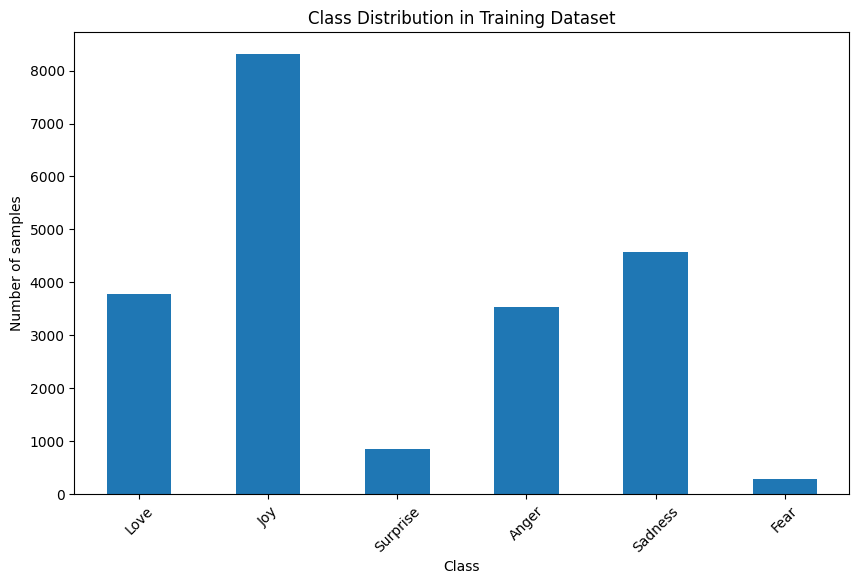

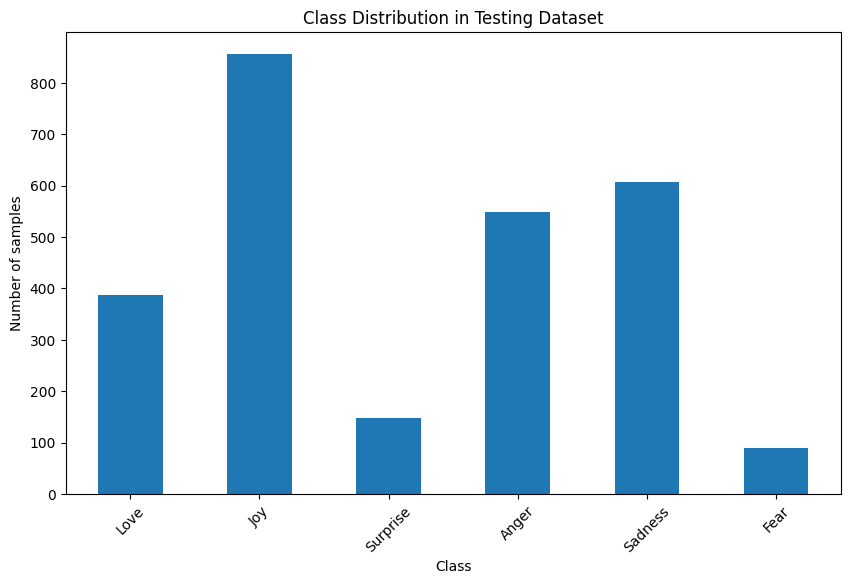

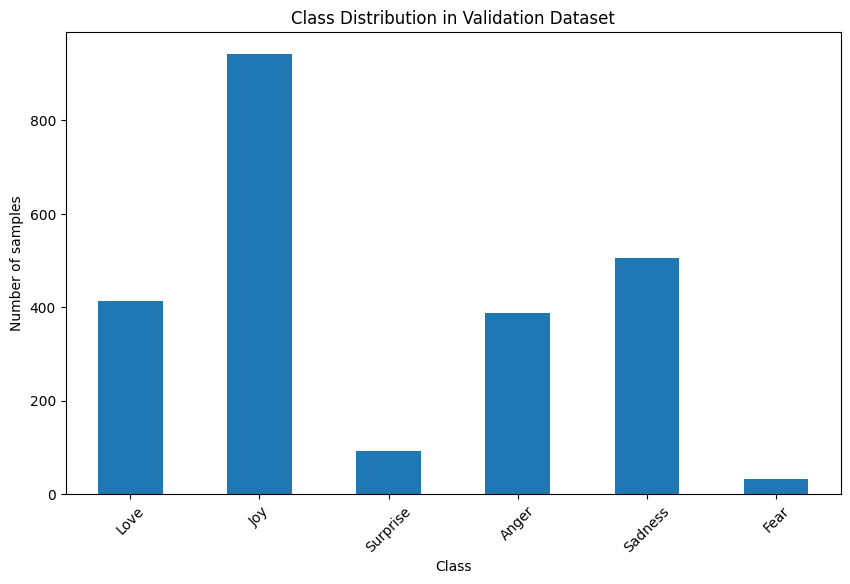

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(df, dataset_name):
    class_counts = df.iloc[:, -6:].sum()
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.title(f'Class Distribution in {dataset_name} Dataset')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45)  # Rotate class labels for better readability if needed
    plt.show()

# Plot class distribution for each dataset
plot_class_distribution(df_train, 'Training')
plot_class_distribution(df_test, 'Testing')
plot_class_distribution(df_val, 'Validation')


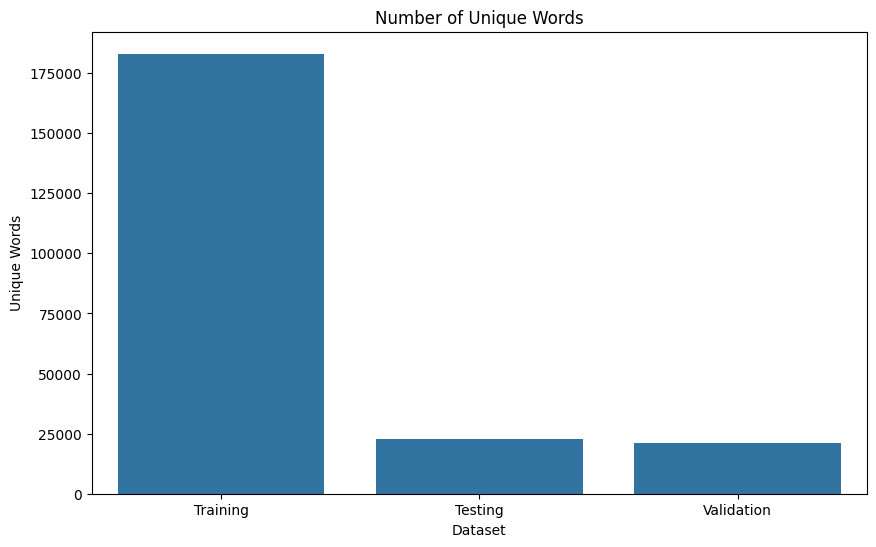

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV files are already loaded into DataFrames: df_train, df_test, df_val
# Calculate the number of unique words for each dataset
unique_words_train = df_train['Data'].apply(lambda x: len(set(x.split()))).sum()
unique_words_test = df_test['Data'].apply(lambda x: len(set(x.split()))).sum()
unique_words_val = df_val['Data'].apply(lambda x: len(set(x.split()))).sum()

# Prepare the data for plotting
unique_words_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Unique Words': [unique_words_train, unique_words_test, unique_words_val]
}

unique_words_df = pd.DataFrame(unique_words_data)

# Plot the number of unique words
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Unique Words', data=unique_words_df)
plt.title('Number of Unique Words')
plt.show()


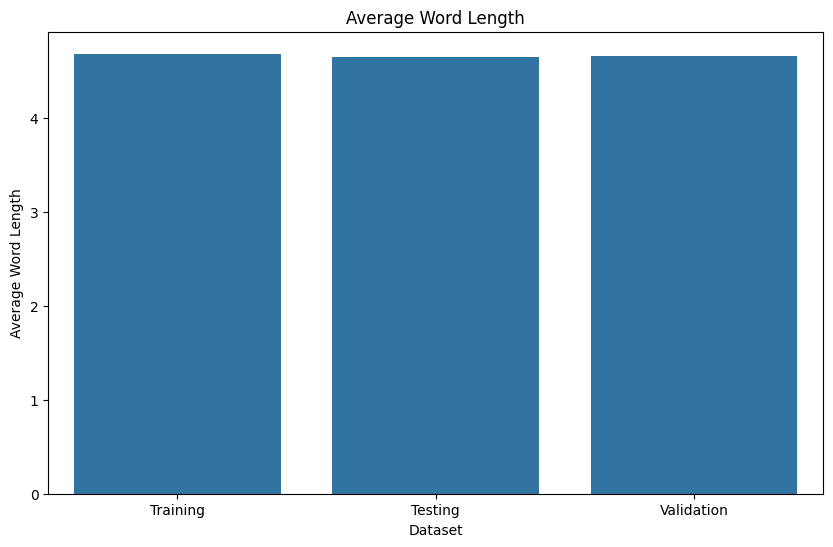

In [114]:
# Calculate the average word length for each dataset
avg_word_length_train = df_train['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()
avg_word_length_test = df_test['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()
avg_word_length_val = df_val['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()

# Prepare the data for plotting
avg_word_length_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Average Word Length': [avg_word_length_train, avg_word_length_test, avg_word_length_val]
}

avg_word_length_df = pd.DataFrame(avg_word_length_data)

# Plot the average word length
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Average Word Length', data=avg_word_length_df)
plt.title('Average Word Length')
plt.show()


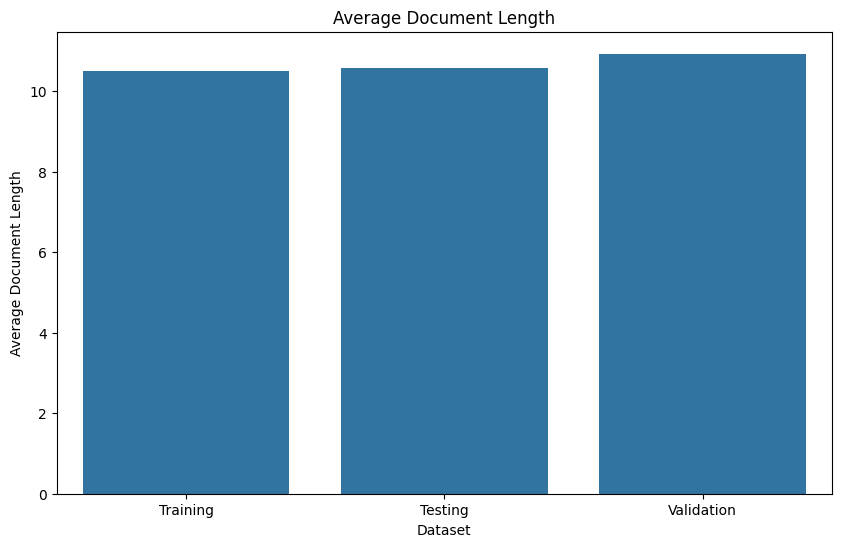

In [115]:
# Calculate the average document length for each dataset
avg_doc_length_train = df_train['Data'].apply(lambda x: len(x.split())).mean()
avg_doc_length_test = df_test['Data'].apply(lambda x: len(x.split())).mean()
avg_doc_length_val = df_val['Data'].apply(lambda x: len(x.split())).mean()

# Prepare the data for plotting
avg_doc_length_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Average Document Length': [avg_doc_length_train, avg_doc_length_test, avg_doc_length_val]
}

avg_doc_length_df = pd.DataFrame(avg_doc_length_data)

# Plot the average document length
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Average Document Length', data=avg_doc_length_df)
plt.title('Average Document Length')
plt.show()


#Preprocessing

In [116]:
def remove_punctuations(my_str):
    # define punctuation
    #punctuations = '''````¬£|¬¢|√ë+-*/=EROero‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ012‚Äì34567‚Ä¢89‡•§!()-[]{};:'"‚Äú\‚Äô,<>./?@#$%^&*_~‚Äò‚Äî‡••‚Äù‚Ä∞‚öΩÔ∏è‚úåüòÄüòÉüòÑüòÅüòÜü•πüòÖü§£üòÇü•≤üòäüòáüôÇüôÉüòâüòåüòçü•∞üòòüòóüòôüòöüòãüòõüòùüò†üò§üò≠üò¢ü•∫üò©üò´üòñüò£‚òπÔ∏èüôÅüòïüòüüòîüòûüòíüòèü•≥ü§©ü•∏üòéü§ìüßêü§®ü§™üòúüò°ü§¨ü§Øüò≥ü•µü•∂üò∂‚Äçüå´Ô∏èüò±üò®üò∞üò•üòìü§óü§îü´£ü§≠ü´¢ü´°ü§´ü´†ü§•üò∂ü´•üòêü´§üòëüòàü§†ü§ëü§ïü§íüò∑ü§ßü§Æü§¢ü•¥ü§êüòµ‚Äçüí´üòµüòÆ‚Äçüí®üò™ü§§üò¥ü•±üò≤üòÆüòßüò¶üòØüôÑüò¨ü´®ü´∂ü§≤üëêüôåüëèü§ö‚òùÔ∏è‚úãüëáüëÜüëâüëàü´¥ü´¥ü´≥ü§èü§åüëåü§òü§üü´∞‚úåÔ∏èü§ûü´∏ü´∑ü§úü§õ‚úäüëäüëéüëçü§ùüñêÔ∏èüññüëãü§ôü´≤ü´±üí™üñïüôèü´µ‚úçÔ∏èüëÄü©∑‚ù§Ô∏èüß°üíõüíöü©µüíôüíúüñ§ü©∂ü§çü§éÔøΩÔø∞‡ß∑Ôø∞'''
    punctuations = '''````¬£|¬¢|√ë+-*/=EROero‡ß≥‡ß¶‡ßß‡ß®‡ß©‡ß™‡ß´‡ß¨‡ß≠‡ßÆ‡ßØ012‚Äì34567‚Ä¢89‡•§!()-[]{};:'"‚Äú\‚Äô,<>./?@#$%^&*_~‚Äò‚Äî‡••‚Äù‚Ä∞Ôø∞‡ß∑Ôø∞'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

In [117]:
def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

In [118]:
def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [119]:
df_train['text'] = df_train.Data.apply(lambda x: preprocessing(str(x)))
df_test['text'] = df_test.Data.apply(lambda x: preprocessing(str(x)))
df_val['text'] = df_val.Data.apply(lambda x: preprocessing(str(x)))

In [120]:
df_train = df_train.drop(['Data'], axis=1)
df_train.head(2)
df_test = df_test.drop(['Data'], axis=1)
df_test.head(2)
df_val = df_val.drop(['Data'], axis=1)
df_val.head(2)

ID  Love  Joy  Surprise  Anger  Sadness  Fear  \
0  18313     0    1         0      0        0     0   
1  13039     0    0         0      1        0     0   

                                                text  
0  ‡¶ö‡¶ü‡ßç‡¶∞‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶è‡¶¨‡¶Ç ‡¶ï‡¶ï‡ßç‡¶∏‡¶¨‡¶æ‡¶ú‡¶æ‡¶∞ ‡¶¨‡¶®‡ßç‡¶Ø‡¶æ ‡¶ï‡¶¨‡¶≤‡¶ø‡¶§ ‡¶è‡¶≤‡¶æ‡¶ï‡¶æ‡¶§‡ßá ‡¶§‡ßç...  
1  ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶ï‡¶æ‡¶õ‡ßá ‡¶õ‡¶ø‡¶≤ ‡¶∂‡ßÅ‡¶ß‡ßÅ ‡¶∞‡¶ø‡¶π‡¶æ‡¶®‡ßá‡¶∞ ‡¶´‡¶ü‡ßã ‡¶è‡¶≤‡¶¨‡¶æ‡¶Æ ‡¶¨‡¶õ‡¶∞ ‡¶¶‡ßÅ‡ßü‡ßá‡¶ï...

In [121]:
sample_data = [10,100,150,2000,2500,4000,4500,5000]
for i in sample_data:
     print(f"Cleaned Text: \n {df_train.text[i]}\n")

sample_data = [100,150]
for i in sample_data:
     print(f"Cleaned Text: \n {df_test.text[i]}\n")

sample_data = [10,100,150]
for i in sample_data:
     print(f"Cleaned Text: \n {df_val.text[i]}\n")

Cleaned Text: 
 ‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶ ‡¶Ö‡¶Æ‡¶ø ‡¶≠‡¶æ‡¶á ‡¶∏‡¶π ‡¶™‡ßÅ‡¶∞‡ßã ‡¶¨‡ßç‡¶Ø‡¶æ‡¶ö‡ßá‡¶≤‡¶∞ ‡¶ü‡¶ø‡¶Æ ‡¶ï‡ßá 

Cleaned Text: 
 ‡¶Ö‡¶®‡ßá‡¶ï ‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡¶æ‡¶ó‡¶≤‡ßã ‡¶ó‡¶æ‡¶®‡¶ü‡¶æ ‡¶∂‡ßÅ‡¶®‡ßá 

Cleaned Text: 
 ‡¶Ü‡¶Æ‡¶æ‡¶∞‡¶æ ‡¶∏‡¶¨‡¶æ‡¶á ‡¶è‡¶ï‡¶æ ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶∏‡¶¨‡¶æ‡¶á ‡¶Æ‡¶ø‡¶≤‡ßá ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶è‡¶ï‡¶æ ‡¶®‡¶æ‡¶è‡¶≠‡¶æ‡¶¨‡ßá ‡¶è‡¶ï‡¶ú‡¶® ‡¶è‡¶ï‡¶ú‡¶®‡ßá‡¶∞ ‡¶¶‡¶æ‡ßü‡¶ø‡¶§‡ßç‡¶¨ ‡¶®‡¶ø‡¶≤‡ßá ‡¶∞‡¶æ‡¶®‡¶æ‡¶∞‡¶æ ‡¶™‡¶æ‡¶¨‡ßá ‡¶è‡¶ï‡¶ü‡¶æ ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶ú‡ßÄ‡¶¨‡¶®  

Cleaned Text: 
 ‡¶õ‡ßá‡¶≤‡ßá ‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶ú‡ßá‡¶Æ‡¶® ‡¶ó‡¶∞‡¶¶‡¶¨ ‡¶Æ‡ßá‡ßü‡ßá ‡¶ó‡ßÅ‡¶≤‡¶æ‡¶ì ‡¶§‡ßá‡¶Æ‡¶® 

Cleaned Text: 
 ‡¶§‡ßÅ‡¶Æ‡¶ø‡¶á ‡¶§‡ßã ‡¶∂‡¶ø‡¶ñ‡¶ø‡ßü‡ßá‡¶õ ‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ ‡¶≤‡¶æ‡¶≠ ‡¶ì ‡¶∂‡¶ø‡¶ï‡ßç‡¶∑‡¶æ ‡¶™‡¶æ‡¶ì‡ßü‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø‡¶á ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Æ ‡¶§‡ßÅ‡¶Æ‡¶ø ‡¶¨‡¶≤‡ßá‡¶õ‡¶ø‡¶≤‡ßá 

Cleaned Text: 
 ‡¶á‡¶ö‡ßç‡¶õ‡ßá ‡¶õ‡¶ø‡¶≤ ‡¶∂‡¶ø‡¶∂‡¶∞ ‡¶π‡¶¨ 

Cleaned Text: 
 ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶≠‡¶æ‡¶ó‡ßç‡¶Ø ‡¶ì‡¶∞‡¶æ ‡¶ï‡¶∞‡ßá ‡¶¨‡¶ø‡¶

In [122]:
df_train.to_csv('Final_Train.csv', index = False)
df_val.to_csv('Final_Val.csv', index = False)
df_test.to_csv('Final_Test.csv', index = False)